# Topic 3: Recommender System

# 02. Explore Data (EDA)

In [9]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Read data
products = pd.read_csv('ProductRaw.csv')
reviews = pd.read_csv('ReviewRaw.csv')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\hoang\.conda\envs\demo2\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\hoang\AppData\Local\Temp\ipykernel_5220\4008950605.py", line 2, in <cell line: 2>
    products = pd.read_csv('ProductRaw.csv')
  File "C:\Users\hoang\.conda\envs\demo2\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\hoang\.conda\envs\demo2\lib\site-packages\pandas\io\parsers\readers.py", line 680, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\hoang\.conda\envs\demo2\lib\site-packages\pandas\io\parsers\readers.py", line 575, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\hoang\.conda\envs\demo2\lib\site-packages\pandas\io\parsers\readers.py", line 934, in __init__
  File "C:\Users\hoang\.conda\envs\demo2\lib\site-packages\pandas\io\parsers

In [3]:
print('Trước khi dropping, records =', products.shape[0])
products.drop_duplicates(inplace=True)
print('Sau khi dropping, records =', products.shape[0])

Trước khi dropping, records = 4404
Sau khi dropping, records = 4373


In [4]:
print('Trước khi dropping, records =', products.shape[0])
reviews.drop_duplicates(inplace=True)
print('Sau khi dropping, records =', products.shape[0])

Trước khi dropping, records = 4373
Sau khi dropping, records = 4373


# 1.Product

In [5]:
products.head(5)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [6]:
products.shape

(4373, 10)

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4373 entries, 0 to 4403
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4373 non-null   int64  
 1   name         4373 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4373 non-null   float64
 4   price        4373 non-null   int64  
 5   list_price   4373 non-null   int64  
 6   brand        4373 non-null   object 
 7   group        4373 non-null   object 
 8   url          4373 non-null   object 
 9   image        4373 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 375.8+ KB


In [8]:
pd.options.display.float_format = '{:,.2f}'.format
products[['price', 'rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,"4,373.00","2,763,501.13","5,544,076.83","7,000.00","150,000.00","487,000.00","2,680,000.00","62,690,000.00"
rating,"4,373.00",3.67,1.80,0.00,3.80,4.50,4.80,5.00


Nhan xet:
+ Rating san pham(sp): trong khoang 0-5, mean la 3.68, gia tri 50% la 4.50
+ Price san pham(sp): trong khoang 7K- gan 3690k (big gap), mean xap xi 3870k, gia tri 50% la 790k

# 1.1 Gia ban

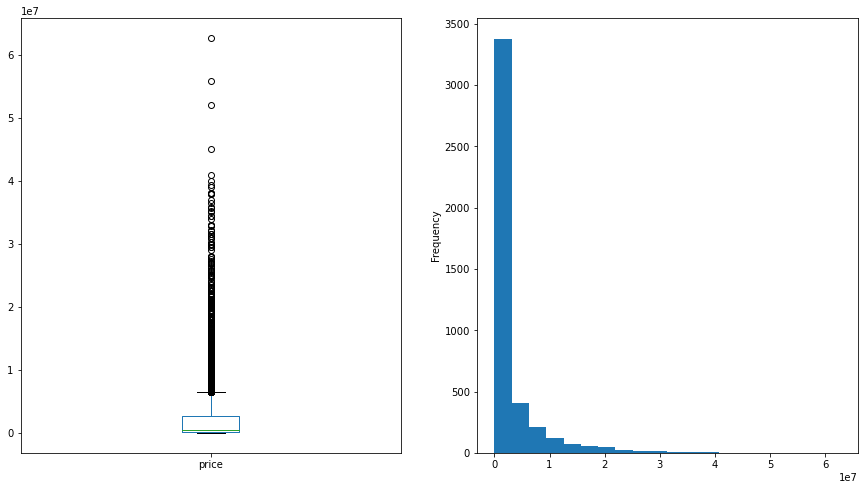

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
products.price.plot(kind='box', ax=ax[0])
products.price.plot(kind='hist', bins=20, ax=ax[1])
plt.show()

Nhan xet:
+ Gia sp co khoang thay doi rat rong trong khoang 7k-62.690K
+ tap trong o khoang gia <3.000K
+ Nhieu gia tri Outliner

# 1.2 Thuong hieu

In [10]:
# sp theo brand
brands = products.groupby('brand')['item_id'].count().sort_values(ascending=False)
brands

brand
OEM               1115
Samsung            199
LG                  96
Panasonic           96
Sony                95
                  ... 
KTV                  1
KBVISION-USA         1
KAPUSI               1
Joy Collection       1
xMOWI                1
Name: item_id, Length: 521, dtype: int64

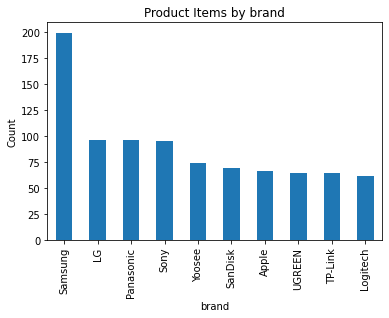

In [11]:
# Top 10 thuong hieu co so luong ma san pham cao nhat (tru OEM)
brands[1:11].plot(kind='bar')
plt.ylabel('Count')
plt.title('Product Items by brand')
plt.show()

Nhan xet:
    Thuong hieu Samsung co so lunog ma hang nhieu nhat (neu bo OEM) cac thuong hieu khac co so luong ma hang gan giong nhau

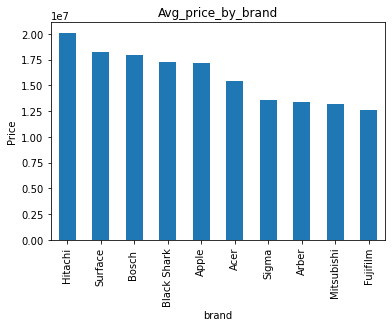

In [12]:
# Gia ban theo thuong hieu top 10
price_by_brand = products.groupby('brand')['price'].mean().sort_values(ascending=False)
price_by_brand[:10].plot(kind='bar')
plt.ylabel('Price')
plt.title('Avg_price_by_brand')
plt.show()

Nhan xet:
    Ve gia ban thi Hitachi co gia tri trung binh cao nhat sau do toi Surface, Bosh

# 1.1 Rating

In [13]:
ratings = products.groupby('rating')['item_id'].count().sort_values(ascending=False)
ratings

rating
0.00    790
5.00    593
4.80    442
4.70    427
4.60    361
4.50    326
4.30    233
4.90    220
4.00    204
4.40    191
4.20    125
4.10     77
3.80     61
3.70     54
3.00     52
3.90     49
3.50     40
1.00     24
3.60     23
3.30     17
3.40     15
3.20      9
2.50      7
2.00      7
2.70      6
3.10      5
2.80      4
2.30      4
2.20      2
1.30      2
1.80      1
2.60      1
2.10      1
Name: item_id, dtype: int64

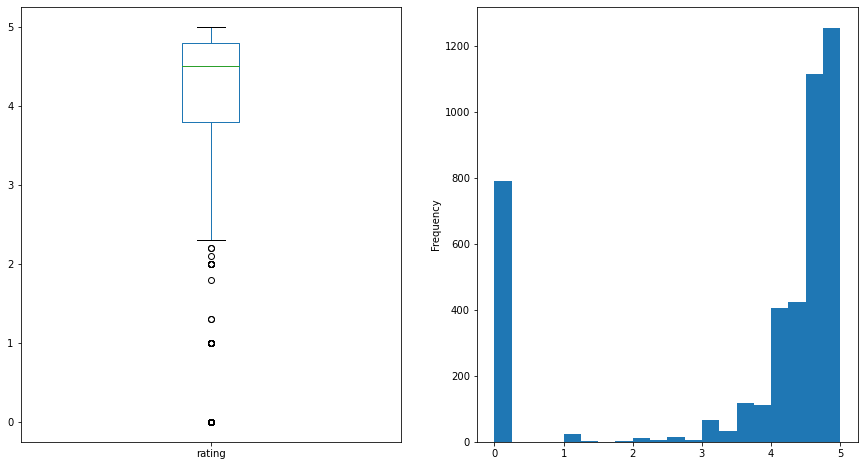

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
products.rating.plot(kind='box', ax=ax[0])
products.rating.plot(kind='hist', bins=20, ax=ax[1])
plt.show()

Nhan xet:
+ Rating 0 la nhieu nhat sau do la rating tu khoang 4-5
+ Co Outlier <2.5
+ Xu huong KH neu te thi rating 0 neu tot thi rating 4-5

In [15]:
# Product Average Rating
product_avg_rating = reviews.groupby(by="product_id").mean()["rating"].to_frame().reset_index()
product_avg_rating.rename({'rating':'avg_rating'}, axis=1, inplace=True)
product_avg_rating.head()

,product_id,avg_rating
0,54665,4.60
1,55897,4.63
2,104180,4.48
3,116897,4.24
4,122012,4.49


# 2 Review

In [16]:
reviews.head(5)

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [17]:
reviews.shape

(361750, 8)

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361750 entries, 0 to 364098
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   361750 non-null  int64 
 1   product_id    361750 non-null  int64 
 2   name          361322 non-null  object
 3   full_name     327147 non-null  object
 4   created_time  116225 non-null  object
 5   rating        361750 non-null  int64 
 6   title         361721 non-null  object
 7   content       165686 non-null  object
dtypes: int64(3), object(5)
memory usage: 24.8+ MB


In [19]:
reviews.columns

Index(['customer_id', 'product_id', 'name', 'full_name', 'created_time',
       'rating', 'title', 'content'],
      dtype='object')

In [20]:
pd.options.display.float_format = '{:,.2f}'.format
reviews[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,"361,750.00",4.47,1.02,1.00,4.00,5.00,5.00,5.00


Tuong tu nhu voi products

# 2 Review-Rating

In [44]:
ratings = reviews.groupby('rating')['customer_id'].count().sort_values(ascending=False)
ratings

rating
5    256667
4     60666
3     20643
1     16655
2      7119
Name: customer_id, dtype: int64

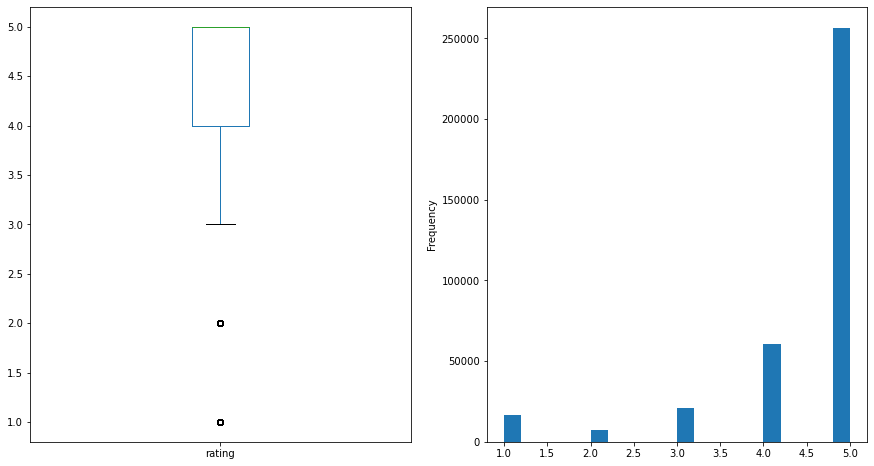

In [45]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
reviews.rating.plot(kind='box', ax=ax[0])
reviews.rating.plot(kind='hist', bins=20, ax=ax[1])
plt.show()

In [ ]:
# Rating rang 1-5 most of is rating 5

# 2 Review-Customer_id

In [21]:
reviews.product_id.unique().shape[0]

4218

In [22]:
check_list = np.setdiff1d(products.item_id, reviews.product_id.unique())
check_list

array([  576128,   711323,   716466,   724530,   760545,  1011988,
        2680853,  4219781,  6933309,  7447383,  9793739, 10709723,
       11251735, 11418386, 11465847, 11468555, 11468703, 13151476,
       13151574, 14568998, 15428119, 16519193, 16520424, 16964464,
       20352015, 20712264, 20712584, 20958295, 22967676, 23117977,
       25081207, 29440849, 29446449, 31169861, 35195236, 36995341,
       40347531, 41274209, 47290166, 47292697, 47374311, 48429836,
       48612183, 48613176, 48812108, 49360016, 50007550, 50685658,
       51200545, 52002453, 52326343, 52417468, 52460684, 52461449,
       52480318, 52644706, 52864679, 53330127, 53380152, 53646144,
       53840141, 54802325, 55583863, 55825364, 55985257, 57053835,
       57437733, 58146831, 58152969, 58162174, 58391908, 58530887,
       58531097, 58913262, 59452897, 59581811, 66385255, 67081292,
       68495317, 68532909, 68645736, 68821409, 68840521, 68842354,
       68847367, 69190011, 69459839, 69752015, 70332634, 70773

Many product have no review

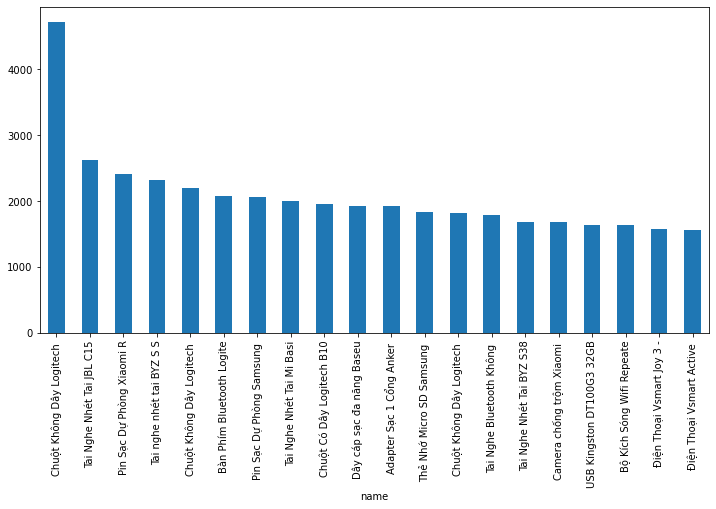

In [23]:
# Top 20 products had the highest number of reviews
plt.figure(figsize=(12,6))
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:20]
top_products.index = products[products.item_id.isin(top_products.index)]['name'].str[:25]
top_products.plot(kind='bar')
plt.show()

Chuot khong day Logitech co nhieu comment nhat va cao dot bien (>4k)
Cac san pham khac trong co so luong comment chenh lech ko nhieu (3k-1.8k)

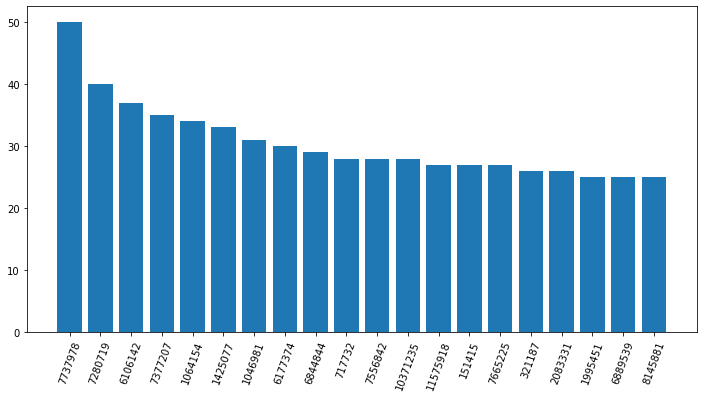

In [24]:
# Top 20 cusotmers who reviewed the most

top_rating_customer = reviews.groupby('customer_id').count()['product_id'].sort_values(ascending=False)[:20]
plt.figure(figsize=(12,6))
plt.bar(x=[str(x) for x in top_rating_customer.index], height=top_rating_customer.values)
plt.xticks(rotation=70)
plt.show()

In [25]:
# Max review quantity is 50

<AxesSubplot:ylabel='Frequency'>

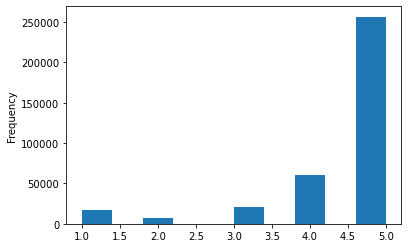

In [26]:
# Distribution of rating
reviews.rating.plot(kind='hist')

In [27]:
# Most of rating is 4-5

# 2 Review-Product

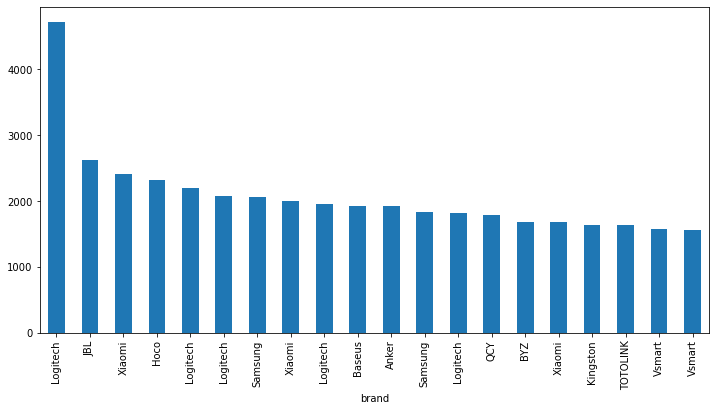

In [33]:
# Top 20 Brand had the highest number of reviews
plt.figure(figsize=(12,6))
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:20]
top_products.index = products[products.item_id.isin(top_products.index)]['brand'].str[:25]
top_products.plot(kind='bar')
plt.show()

In [35]:
# Logitech have most comment and have big gap to other brand
# 2nd is JBL and rd Xiaomi but 2nd-3rd gap is not much

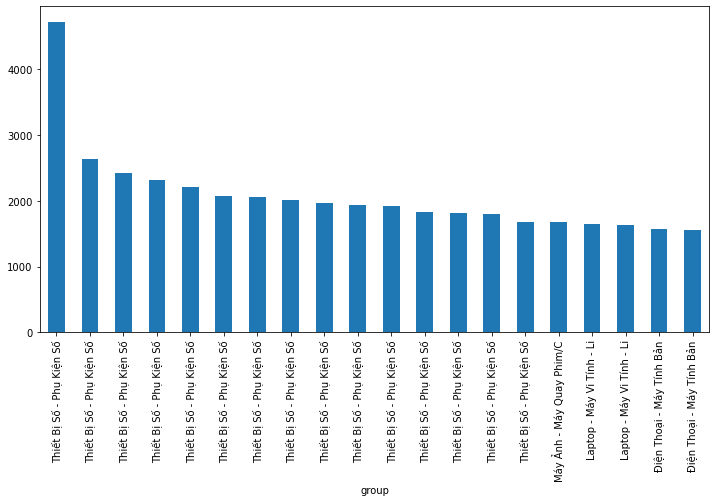

In [34]:
# Top 20 Brand had the highest number of reviews
plt.figure(figsize=(12,6))
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:20]
top_products.index = products[products.item_id.isin(top_products.index)]['group'].str[:25]
top_products.plot(kind='bar')
plt.show()

In [ ]:
# Thiet Bi So- Phu Kien So have most comment and have big gap to other group

# Word Cloud

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
def word_cloud_review_of_rating(rating):
  reviews_with_rating = ''.join(str(reviews[reviews['rating']==rating]['content']))
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(reviews_with_rating)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(word_cloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

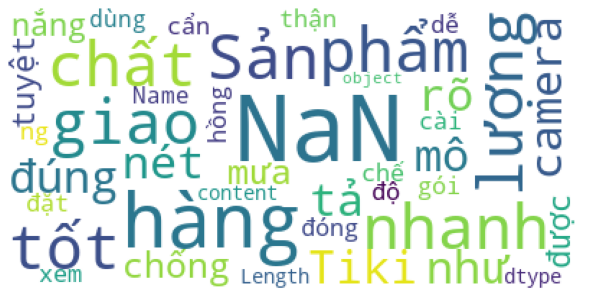

In [41]:
#word_cloud_review_of_good rating=5
word_cloud_review_of_rating(5)

In [47]:
# 1 so luong lon rating 5 bi NaN => ko phu thuoc vao content can phai noi them content voi cot khac vd nhu tittle

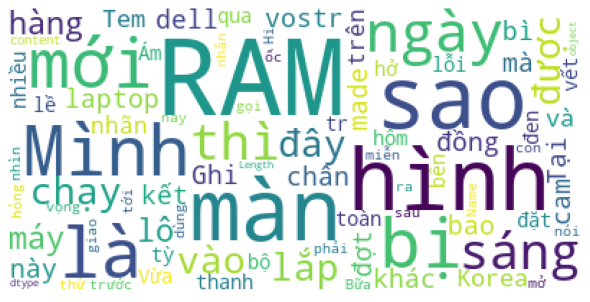

In [46]:
word_cloud_review_of_rating(1)

In [ ]:
# ko thay ro y chinh => clean du lieu